# Prelucrarea Semnalelor
## Tema 1
### Miu Elena Adania
### Grupa 333

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import datasets
from scipy.fft import dctn, idctn
from PIL import Image

C:\Users\adani\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## Ex1
### Completati algoritmul JPEG incluzand toate blocurile din imagine.

In [2]:
imagine = datasets.ascent()

In [3]:
Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

In [4]:
# Aloc spatiu pentru imaginea jpeg
jpeg = np.zeros_like(imagine)

In [5]:
# Retin statistici pentru a verifica numarul de componente nenule inainte si dupa compresie
inainte = dupa = 0

In [6]:
# Aplic compresia DCT pe portiuni din imagine, pe rand

inaltime, latime = imagine.shape
inaltime = inaltime // 8 # impart la 8 pentru ca 8 este lungimea unui rand din matricea Q_jpeg
latime = latime // 8

for i in range(inaltime):
    for j in range(latime):
        # Extrag portiunea curenta
        portiune = imagine[i * 8 : (i + 1) * 8, j * 8 : (j + 1) * 8]
        
        # Trec portiunea curenta in domeniul frecventa
        portiune_frecv = dctn(portiune)
            
        # Numar frecventele nenule inainte de cuantizare
        inainte += np.count_nonzero(portiune_frecv)

        # Cuantizare
        portiune_cuantizata = Q_jpeg * np.round(portiune_frecv / Q_jpeg)
            
        # Numar frecventele nenule dupa cuantizare
        dupa += np.count_nonzero(portiune_cuantizata)
    
        # Trec portiunea inapoi in domeniul initial
        portiune_cuantizata = idctn(portiune_cuantizata)
            
        # Salvez portiunea cuantizata in rezultatul jpeg
        jpeg[i * 8 : (i + 1) * 8, j * 8 : (j + 1) * 8] = portiune_cuantizata

In [7]:
print('Componente nenule in frecventa inainte de compresia JPEG: {}'.format(inainte))
print('Componente nenule in frecventa dupa compresia JPEG: {}'.format(dupa))

Componente nenule in frecventa inainte de compresia JPEG: 250424
Componente nenule in frecventa dupa compresia JPEG: 125064


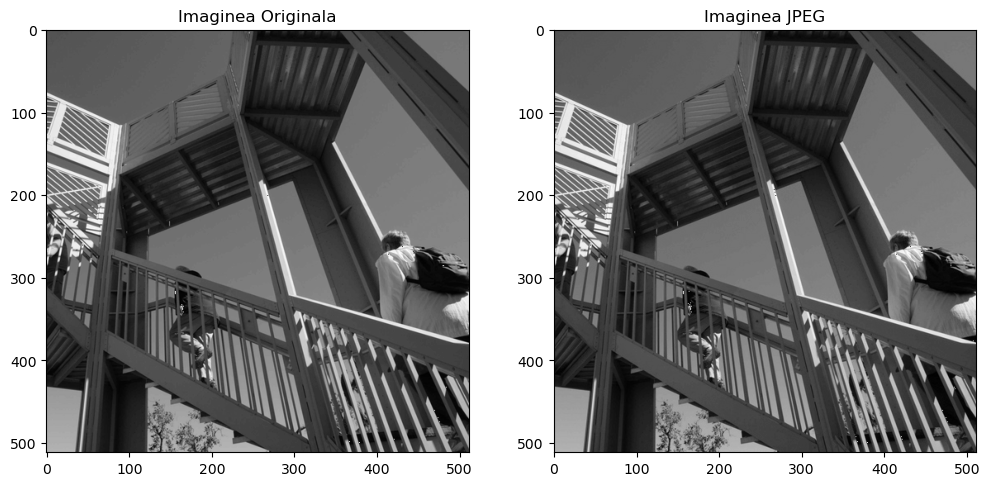

In [8]:
# Afisez imaginea originala si compresia JPEG
figure, axis = plt.subplots(1, 2, figsize=(12, 10))
axis[0].imshow(imagine, cmap='gray')
axis[0].set_title("Imaginea Originala")
axis[1].imshow(jpeg, cmap='gray')
axis[1].set_title("Imaginea JPEG")
plt.show()

## Ex2
### Extindeti la imagini color (incluzand transformarea din RGB in Y'CbCr). Exemplificati pe scipy.misc.face folosita in tema anterioara.

In [9]:
imagine_color = datasets.face()

In [10]:
inaltime2, latime2, _ = imagine_color.shape

In [11]:
ycbcr = np.array(Image.fromarray((imagine_color).astype(np.uint8)).convert('YCbCr'))

In [12]:
jpeg_color = np.zeros_like(imagine_color)

In [13]:
canale = [ycbcr[:, :, i] for i in range(3)]
canale_rez = [np.zeros_like(canale[i]) for i in range(3)]

In [14]:
for i in range(inaltime2 // 8):
    for j in range(latime2 // 8):
        for k in range(3):
            portiune = canale[k][i * 8 : (i + 1) * 8, j * 8 : (j + 1) * 8]
            portiune_frecv = dctn(portiune)

            portiune_cuantizata = Q_jpeg * np.round(portiune_frecv / Q_jpeg)

            portiune_cuantizata = idctn(portiune_cuantizata)
            
            canale_rez[k][i * 8 : (i + 1) * 8, j * 8 : (j + 1) * 8] = portiune_cuantizata

In [15]:
for i in range(inaltime2):
    for j in range(latime2):
        for k in range(3):
            jpeg_color[i][j][k] = int(canale_rez[k][i][j])

In [16]:
jpeg_color = np.array(Image.fromarray(np.array(jpeg_color).astype(np.uint8), mode='YCbCr').convert('RGB'))

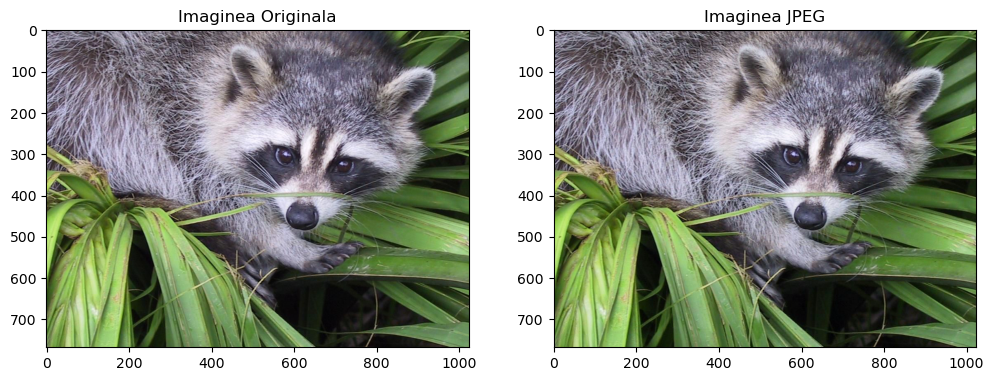

In [17]:
figure, axis = plt.subplots(1, 2, figsize=(12, 10))
axis[0].imshow(imagine_color)
axis[0].set_title("Imaginea Originala")
axis[1].imshow(jpeg_color)
axis[1].set_title("Imaginea JPEG")
plt.show()